## Load in datasets

The datasets consist of:

    - train.csv (a training dataset)
    - test.csv (a test dataset)
    - oil.csv, transactions.csv, holidays_events.csv (exogenous datasets)
    - stores.csv (a dataset the links store information)

The data is attached in the `data` folder in the `store-sales-time-series-forecasting.zip`, and can be unzipped using the `unzip` command.

In [29]:
import sys

if "../" not in sys.path:
    sys.path.append("../")

from time_series_dataset import SalesDataset

batch_size=16
sdata = SalesDataset(
    train_path="../../../data/train.csv", 
    test_path="../../../data/test.csv", 
    oil_path="../../../data/oil.csv"
)

train_loader, val_loader = sdata.get_loaders(include_exog=True, batch_size=batch_size)
x, y = next(iter(train_loader))
input_size = x.shape[-1]

/Users/cullenpaulisick/opt/anaconda3/envs/default_ml_dev/lib/python3.10/site-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Demonstrate Forward Pass

In [30]:
import torch
from torch import nn

# class RNN(nn.Module):
#     def __init__(
#             self, 
#             input_size, 
#             output_size,
#             hidden_dim, 
#             n_layers, 
#             drop_prob: float=0.5
#         ):
#         super(RNN, self).__init__()
#         self = self.float()
#         # hidden dimension
#         self.hidden_dim=hidden_dim
#         # define an RNN with specified parameters
#         # batch_first means that the first dim of the input and output will be the batch_size
#         self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
#         self.dropout = nn.Dropout(drop_prob)
#         # last, fully-connected layer
#         self.fc = nn.Linear(hidden_dim, output_size)

#     def forward(self, x, hidden):
#         # x (batch_size, seq_length, input_size)
#         # hidden (n_layers, batch_size, hidden_dim)
#         # r_out (batch_size, time_step, hidden_size)
#         batch_size = x.size(0)
#         seq_length = x.size(1)
        
#         # get output and hidden output for x input and previous hidden dimension
#         r_out, hidden = self.rnn(x, hidden)
#         out = self.dropout(r_out)
#         # shape output to be (batch_size, seq_length, hidden_dim)
#         out = out.view(batch_size, seq_length, self.hidden_dim)  
#         # get final output 
#         output = self.fc(r_out)
        
#         return output, hidden
    
#     def init_hidden(self, batch_size):
#         ''' Initializes hidden state '''
#         # Create two new tensors with sizes n_layers x batch_size x n_hidden,
#         # initialized to zero, for hidden state and cell state of LSTM
#         weight = next(self.parameters()).data
        
#         if (self.train_on_gpu):
#             hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda()
#         else:
#             hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        
#         return hidden

#     def training_cycle(self, train_loader, val_loader, epochs, print_every, criterion, optimizer):
#         # initialize the hidden state 
#         for epoch in range(epochs):
#             hidden=None
#             # defining the training data 
#             running_train_loss = 0
#             self.train()
#             for x, y in train_loader:
#                 # set training mode
#                 # convert data into Tensors
#                 x_tensor = torch.Tensor(x).float()
#                 y_tensor = torch.Tensor(y).unsqueeze(-1).float()
#                 # outputs from the rnn from train
#                 prediction, hidden = self(x_tensor, hidden)

#                 ## Representing Memory ##
#                 # make a new variable for hidden and detach the hidden state from its history
#                 # this way, we don't backpropagate through the entire history
#                 hidden = hidden.data
#                 # calculate the loss
#                 loss = criterion(prediction, y_tensor)
#                 # zero gradients
#                 optimizer.zero_grad()
#                 # perform backprop and update weights
#                 loss.backward()
#                 optimizer.step()
#                 running_train_loss += loss.item()
            

#             # display loss and predictions
#             if (epoch % print_every == 0) or (epoch==(epochs-1)): 
#                 # calculate final_train_loss
#                 train_loss = running_train_loss/len(train_loader)
#                 # set to eval mode and run validation
#                 self.eval()
#                 hidden=None
#                 running_val_loss = 0
#                 for x_test, y_test in val_loader:
#                     x_tensor_test = torch.Tensor(x_test).float()
#                     y_tensor_test = torch.Tensor(y_test).unsqueeze(-1).float()
#                     # outputs from the rnn for validation
#                     test_prediction, hidden = self(x_tensor_test, hidden)
#                     ## Representing Memory ##
#                     # make a new variable for hidden and detach the hidden state from its history
#                     # this way, we don't backpropagate through the entire history
#                     hidden = hidden.data
#                     # calculate the loss
#                     val_loss = criterion(test_prediction, y_tensor_test)
#                     running_val_loss += val_loss
#                 self.train()

#                 val_loss = running_val_loss/len(val_loader)
#                 print("Epoch: %d, train loss: %1.5f, val loss: %1.5f" % (epoch, train_loss, val_loss))



import torch
from torch.utils.tensorboard import SummaryWriter



from torch import nn
from rnn import TimeSeriesRNN

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
# test that dimensions are as expected
train_loader_i = iter(train_loader)
# retrieve sample data to learn from 
x, y = next(train_loader_i)
test_input = torch.Tensor(x).float()
print('Input size: ', test_input.size())
test_rnn = TimeSeriesRNN(input_size=input_size, output_size=1, hidden_dim=32, n_layers=2)
test_rnn = test_rnn.float()
# # test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h[0].size())
print('Cell state size: ', test_h[1].size())

2023-06-14 15:05:10.344715: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Input size:  torch.Size([16, 20, 2])
No GPU available, training on CPU; consider making n_epochs very small.
Output size:  torch.Size([16, 20, 1])
Hidden state size:  torch.Size([16, 32])
Cell state size:  torch.Size([16, 32])


In [32]:
from torch.utils.tensorboard import SummaryWriter
# decide on hyperparameters
hparams = dict(
model_name="rnn",
input_size=2,
output_size=1,
hidden_dim=68,
drop_prob=0.8,
n_layers=3,
lr = 0.0025
)


with SummaryWriter() as w:
    # instantiate an LSTM with regularization
    rnn = TimeSeriesRNN(hparams['input_size'], 
                hparams['output_size'], 
                hparams['hidden_dim'],
                hparams['n_layers'], 
                drop_prob=hparams['drop_prob'])
    # MSE loss and Adam optimizer with a learning rate of 0.01
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(rnn.parameters(), lr=hparams['lr']) 
    
    train_loss, val_loss = rnn.training_cycle(
        batch_size=batch_size,
        train_loader=train_loader, 
        val_loader=val_loader, 
        epochs=300, 
        print_every=30, 
        criterion=criterion, 
        optimizer=optimizer,
        writer=w
    )
    w.add_hparams(hparam_dict=hparams, 
                  metric_dict={
                        "hparam/train_loss":train_loss,
                        "hparam/val_loss":val_loss
                    }
                )
    w.close()


val_loader_i = iter(val_loader)

No GPU available, training on CPU; consider making n_epochs very small.
Epoch: 0, train loss: 8.40006, val loss: 41.85508
Epoch: 30, train loss: 2.15696, val loss: 8.70346
Epoch: 60, train loss: 1.84016, val loss: 8.40034
Epoch: 90, train loss: 1.69547, val loss: 8.88552
Epoch: 120, train loss: 1.79868, val loss: 8.32000
Epoch: 150, train loss: 1.74378, val loss: 7.98035
Epoch: 180, train loss: 1.86206, val loss: 9.30767
Epoch: 210, train loss: 1.66119, val loss: 8.09234
Epoch: 240, train loss: 1.69338, val loss: 8.33714
Epoch: 270, train loss: 1.80990, val loss: 8.90276
Epoch: 299, train loss: 1.68157, val loss: 8.81053


In [ ]:
val_loader_i = iter(val_loader)

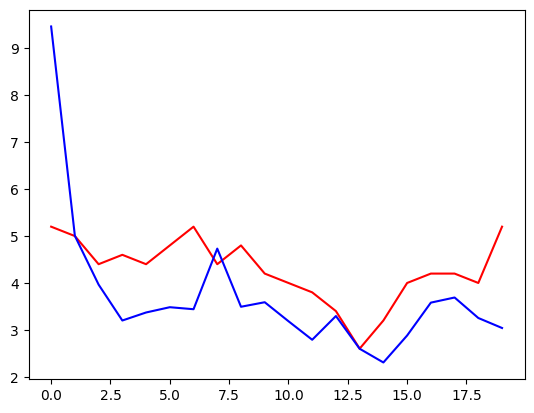

In [46]:
val_x, val_y = next(val_loader_i)
# blue for prediction, red for actual/input
rnn.display_inference(val_x, val_y)